#Fernanda Bravo
#Belen Díaz
#Esteban Gómez
#Rodrigo Reyes

# **Reconocimiento facial de sentimientos**
Decidimos elegir el reconocimiento de sentimientos como nuestro caso de uso, ya que es un tema fascinante y nos ofrece la oportunidad de adquirir un mayor conocimiento en este campo. El reconocimiento de sentimientos a través del análisis de expresiones faciales es una área de investigación emocionante que tiene aplicaciones en diversos campos, como la psicología, la publicidad, la interacción humano-computadora y mucho más.

Nuestro objetivo principal al abordar este tema es desarrollar un sistema capaz de identificar y categorizar las emociones humanas a partir de las expresiones faciales. Esto implica analizar las características y los patrones presentes en las caras de las personas para determinar si están experimentando felicidad, tristeza, enojo, sorpresa u otras emociones reconocibles.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se definen las librerias necesarias:
Estas herramientas son esenciales para manipular datos, visualizar información y construir y evaluar modelos de aprendizaje profundo

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical

# **Data set**

## **Parte 1 Data set**
En este proyecto utilizamos dos conjuntos de datos para mejorar el rendimiento del modelo de reconocimiento facial. El primer conjunto de datos utilizado es de FER-2013, donde se encuentran 35,886 imágenes de 48x48 píxeles. Dentro de este conjunto, el 80% de las imágenes se reservan para el entrenamiento del modelo, mientras que el 10% es el conjunto de prueba publico y el restante 10% es el conjunto de prueba privado.

In [ ]:
path = '/content/drive/MyDrive/Deep learning/lab4y5/challenges-in-representation-learning-facial-expression-recognition-challenge'
os.listdir(path)

['example_submission.csv',
 'icml_face_data.csv',
 'test.csv',
 'train.csv',
 'fer2013']

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Deep learning/lab4y5/challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv")

In [ ]:
data

,emotion,Usage,pixels
0,0,Training,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,Training,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,Training,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,Training,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,Training,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...
...,...,...,...
35882,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
35883,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
35884,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
35885,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


##**Parte 2 dataset**
 El segundo conjunto de datos es un video casero de 20 segundos que contiene expresiones faciales. Para procesar este video, lo dividimos en fotogramas individuales y utilizamos un modelo preentrenado FER-2013 de reconocimiento facial descargado desde el enlace proporcionado en https://github.com/atulapra/Emotion-detection.

El modelo de reconocimiento facial se utiliza para detectar y clasificar las emociones presentes en cada fotograma. Una vez que se identifican las emociones, los fotogramas se etiquetan de manera adecuada y se guardan en la carpeta "frames_etiquetados2". Este proceso nos permite tener una colección de fotogramas con sus respectivas etiquetas de emociones asociadas.

Dado que el procesamiento del video y el etiquetado de los fotogramas ya se ha realizado, no es necesario ejecutar este código nuevamente

In [ ]:
import cv2
import numpy as np
import os
from keras.models import load_model

# Carga el modelo entrenado
trained_model = load_model('/content/drive/MyDrive/deep/lab4y5/modelo_entrenado.h5')
# Etiquetas de emociones
emotions = {0: 'Enojado', 1: 'Asco', 2: 'Miedo', 3: 'Feliz', 4: 'Triste', 5: 'Sorpresa', 6: 'Neutral'}

# Inicializa la captura de video desde el archivo
cap = cv2.VideoCapture('/content/drive/MyDrive/Deep learning/lab4y5/Video2.mp4')
# Crea el directorio para almacenar los fotogramas etiquetados
output_directory = '/content/drive/MyDrive/Deep learning/lab4y5/frames_etiquetados2'
os.makedirs(output_directory, exist_ok=True)

# Crea el clasificador de caras de OpenCV (utiliza haarcascades, reconoce patrones faciales comunes asociados con rostros frontales)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

frame_count = 0

while cap.isOpened():
    # Captura un frame del video
    ret, frame = cap.read()

    if not ret:
        break

    # Convierte la imagen a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detecta caras en el frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extrae la región de interés (ROI) que contiene la cara
        roi = gray[y:y+h, x:x+w]

        # Preprocesa la ROI de la misma manera que los datos de entrenamiento
        roi = cv2.resize(roi, (48, 48))
        roi = roi.astype('float32')/255
        roi = np.reshape(roi, (1, 48, 48, 1))

        # Realiza la predicción utilizando el modelo
        predictions = trained_model.predict(roi)
        emotion_label = emotions[predictions.argmax()]

        # Guarda el frame etiquetado en la carpeta
        output_path = os.path.join(output_directory, f'{emotion_label}_{frame_count:04d}.png')
        cv2.imwrite(output_path, frame)

        frame_count += 1

# Libera los recursos
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 26ms/step


Aqui se muestra de manera aleatoria un conjunto de imágenes etiquetadas con las emociones detectadas en el reconocimiento facial. Las imágenes se han extraído de la carpeta frames_etiquetados2 y se han mezclado para ofrecer una variedad en la visualización.

Cada imagen incluye la emoción detectada y el número de fotograma correspondiente en la secuencia original del video. Este proceso permite una inspección rápida y visual de cómo el modelo interpreta y clasifica las expresiones faciales a lo largo del video.

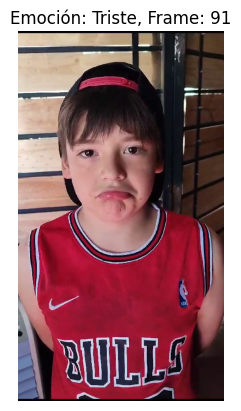

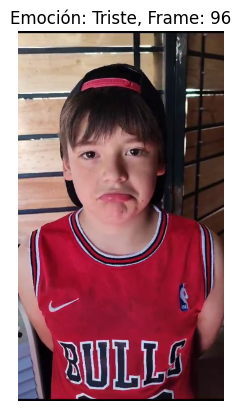

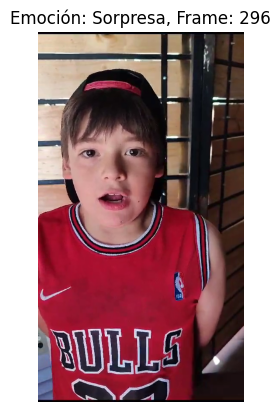

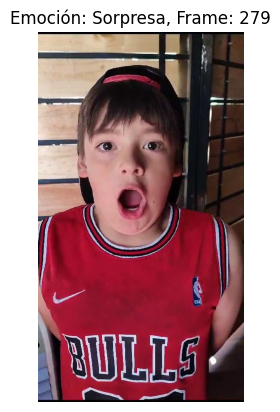

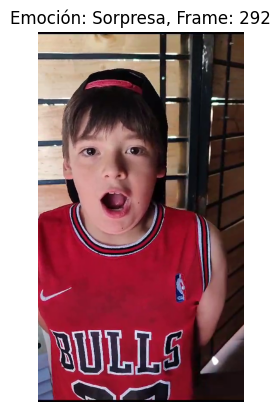

In [ ]:
import os
import cv2
import random
from matplotlib import pyplot as plt

# Directorio donde se guardaron los frames etiquetados
output_directory = '/content/drive/MyDrive/Deep learning/lab4y5/frames_etiquetados2'
# Lista de archivos en el directorio
files = os.listdir(output_directory)

# Mezcla la lista para mostrar imágenes de manera aleatoria
random.shuffle(files)

# Número de imágenes que deseas mostrar
num_images_to_show = 5

# Muestra las imágenes y etiquetas
for file in files[:num_images_to_show]:
    # Extrae la etiqueta y número de frame del nombre del archivo
    emotion, frame_number = file.split('_')
    frame_number = int(frame_number.split('.')[0])

    # Lee la imagen
    img_path = os.path.join(output_directory, file)
    img = cv2.imread(img_path)

    # Convierte la imagen de BGR a RGB
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Muestra la imagen y etiqueta
    plt.imshow(img_rgb)
    plt.title(f'Emoción: {emotion}, Frame: {frame_number}')
    plt.axis('off')
    plt.show()


Este código se encarga del preprocesamiento de imágenes etiquetadas con emociones detectadas. Las imágenes, extraídas de la carpeta frames_etiquetados2, son redimensionadas a un tamaño deseado de (48, 48) píxeles para estandarizar la entrada al modelo de aprendizaje.

Luego, se asignan etiquetas numéricas a las emociones mediante un mapeo predefinido. Las imágenes redimensionadas y sus etiquetas se organizan en conjuntos de entrenamiento, validación y prueba.

Finalmente, se crea un DataFrame de pandas para cada conjunto, donde cada fila contiene la etiqueta numérica y la representación aplanada de la imagen. Estos conjuntos de datos estan en el mismo formato que el data set de FER-2013



In [ ]:
import cv2
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

desired_size = (48, 48)

# Ruta de la carpeta de imágenes
folder_path = '/content/drive/MyDrive/Deep learning/lab4y5/frames_etiquetados2'
# Listas para almacenar las rutas de las imágenes y sus etiquetas
new_image_paths = []
new_labels = []

# Mapeo de emociones
emotion_mapping = {'Enojado': 0, 'Asco': 1, 'Miedo': 2, 'Feliz': 3, 'Triste': 4, 'Sorpresa': 5, 'Neutral': 6}

for filename in os.listdir(folder_path):
    # Lee la imagen
    img_path = os.path.join(folder_path, filename)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    # Verifica si la imagen necesita ser redimensionada
    if img.shape != desired_size:
        img = cv2.resize(img, desired_size)

    # Extrae la etiqueta del nombre del archivo
    label_str = filename.split('_')[0]
    try:
        label = emotion_mapping[label_str]
    except KeyError:
        print(f"Ignorando archivo {filename} con etiqueta no reconocida '{label_str}'")
        continue

    # Guarda la ruta de la imagen y su etiqueta
    new_image_paths.append(img.flatten())  # Aplana la imagen y la agrega a la lista
    new_labels.append(label)

# Convierte las listas a arrays de numpy
new_image_paths = np.array(new_image_paths)
new_labels = np.array(new_labels)

# Divide los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_temp, y_train, y_temp = train_test_split(new_image_paths, new_labels, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Crea un DataFrame de pandas para cada conjunto
df_train = pd.DataFrame(data={'emotion': y_train, ' Usage': 'Training', ' pixels': [' '.join(map(str, row)) for row in X_train]})
df_val = pd.DataFrame(data={'emotion': y_val, ' Usage': 'PrivateTest', ' pixels': [' '.join(map(str, row)) for row in X_val]})
df_test = pd.DataFrame(data={'emotion': y_test, ' Usage': 'PublicTest', ' pixels': [' '.join(map(str, row)) for row in X_test]})

# Concatena los DataFrames
df = pd.concat([df_train, df_val, df_test], ignore_index=True)

# Muestra las primeras filas del DataFrame resultante
df


,emotion,Usage,pixels
0,3,Training,209 209 204 200 200 198 194 193 193 192 188 19...
1,4,Training,209 207 205 202 202 192 199 200 197 208 205 19...
2,6,Training,211 210 207 202 202 200 201 198 203 204 212 12...
3,6,Training,212 210 199 200 200 203 200 194 192 192 192 18...
4,3,Training,212 211 204 203 203 203 201 193 193 193 193 18...
...,...,...,...
340,6,PublicTest,210 209 208 208 207 195 195 195 195 193 192 19...
341,6,PublicTest,210 207 205 207 207 200 195 194 192 192 188 19...
342,5,PublicTest,213 211 213 206 205 203 203 203 191 191 194 20...
343,6,PublicTest,211 210 207 202 202 200 201 198 203 204 212 12...


In [ ]:
# Guardar el DataFrame en un archivo CSV
df.to_csv('/content/drive/MyDrive/Deep learning/lab4y5/df_final2.csv', index=False)

Concatenamos ambos data set para poder ser usados en el entrenamiento


In [ ]:
# Combina ambos conjuntos de datos usando la columna común 'emotion'
combined_df = pd.merge(df, data, on=['emotion', ' Usage', ' pixels'], how='outer')

# Muestra el resultado
combined_df

,emotion,Usage,pixels
0,3,Training,209 209 204 200 200 198 194 193 193 192 188 19...
1,4,Training,209 207 205 202 202 192 199 200 197 208 205 19...
2,6,Training,211 210 207 202 202 200 201 198 203 204 212 12...
3,6,Training,212 210 199 200 200 203 200 194 192 192 192 18...
4,3,Training,212 211 204 203 203 203 201 193 193 193 193 18...
...,...,...,...
36227,6,PrivateTest,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...
36228,3,PrivateTest,178 174 172 173 181 188 191 194 196 199 200 20...
36229,0,PrivateTest,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
36230,3,PrivateTest,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...


# **Preparacion de los datos**
Estas funciones están diseñadas para facilitar la visualización y el análisis de los datos preparados para el modelo de reconocimiento de emociones.

prepare_data(combined_df): Prepara los datos cargados en el DataFrame combined_df para su uso en el modelo, convirtiendo las representaciones de píxeles en matrices de imágenes y etiquetas.

plot_examples(label=0): Muestra ejemplos de imágenes para una emoción específica, facilitando la comprensión visual de la diversidad en los datos.

plot_all_emotions(): Visualiza ejemplos de imágenes para cada emoción, ofreciendo una visión general de la distribución de las emociones en el conjunto de datos.

plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number): Compara la imagen real con la predicción del modelo para una imagen específica.

plot_compare_distributions(array1, array2, title1='', title2=''): Compara las distribuciones de las emociones en dos conjuntos de datos representados por array1 y array2, ayudando a identificar patrones y discrepancias.

Estas funciones juegan un papel crucial en la exploración y comprensión de los datos antes de aplicarlos al modelo de aprendizaje profundo.

In [ ]:
def prepare_data(combined_df):
    # Preparar datos para modelar.
    # Entrada: marco de datos con etiquetas y datos de píxeles
    # Salida: imagen y matriz de etiquetas

    image_array = np.zeros(shape=(len(combined_df), 48, 48))
    image_label = np.array(combined_df['emotion'])

    for i, row in enumerate(combined_df.index):
        image = [int(pixel) for pixel in str(combined_df.loc[row, ' pixels']).split()]

        if len(image) == 2304:  # Verificar la longitud de la lista
            image = np.array(image).reshape(48, 48)
            image_array[i] = image
        else:
            print(f"Ignorando fila {row}: La longitud de la lista de píxeles no es 2304.")

    return image_array, image_label


def plot_examples(label=0):
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(5):
        idx = combined_df[combined_df['emotion']==label].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

def plot_all_emotions():
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace = .2, wspace=.2)
    axs = axs.ravel()
    for i in range(7):
        idx = combined_df[combined_df['emotion']==i].index[i]
        axs[i].imshow(train_images[idx][:,:,0], cmap='gray')
        axs[i].set_title(emotions[train_labels[idx].argmax()])
        axs[i].set_xticklabels([])
        axs[i].set_yticklabels([])

def plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, image_number):
    #Función para trazar la imagen y comparar los resultados de la predicción con la etiqueta.

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

    bar_label = emotions.values()

    axs[0].imshow(test_image_array[image_number], 'gray')
    axs[0].set_title(emotions[test_image_label[image_number]])

    axs[1].bar(bar_label, pred_test_labels[image_number], color='orange', alpha=0.7)
    axs[1].grid()

    plt.show()

def plot_compare_distributions(array1, array2, title1='', title2=''):
    df_array1 = pd.DataFrame()
    df_array2 = pd.DataFrame()
    df_array1['emotion'] = array1.argmax(axis=1)
    df_array2['emotion'] = array2.argmax(axis=1)

    fig, axs = plt.subplots(1, 2, figsize=(12, 6), sharey=False)
    x = emotions.values()

    y = df_array1['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[0].bar(x, y.sort_index(), color='orange')
    axs[0].set_title(title1)
    axs[0].grid()

    y = df_array2['emotion'].value_counts()
    keys_missed = list(set(emotions.keys()).difference(set(y.keys())))
    for key_missed in keys_missed:
        y[key_missed] = 0
    axs[1].bar(x, y.sort_index())
    axs[1].set_title(title2)
    axs[1].grid()

    plt.show()

Visualizamos el contenido de los conjunto de datos


In [ ]:
combined_df[' Usage'].value_counts()

Training       28985
PublicTest      3624
PrivateTest     3623
Name:  Usage, dtype: int64

Mapeo de emociones

In [ ]:
emotions = {0: 'Enojado', 1: 'Asco', 2: 'Miedo', 3: 'Feliz', 4: 'Triste', 5: 'Sorpresa', 6: 'Neutral'}

# **Preparacion para entrenamiento**

En este bloque de código, los datos se están preparando específicamente para su utilización en un modelo de reconocimiento de emociones.

Se utiliza la función prepare_data para extraer conjuntos de imágenes y etiquetas correspondientes a los conjuntos de entrenamiento (Training), validación (PrivateTest), y prueba (PublicTest).

Las imágenes se remodelan para ajustarse a las dimensiones necesarias del modelo (48x48 píxeles) y se normalizan para estar en el rango de [0, 1].

Las etiquetas de las emociones se convierten a representación categórica utilizando la función to_categorical, asegurando que estén en el formato adecuado para el entrenamiento del modelo de aprendizaje profundo.

Estos pasos son esenciales para asegurar que los datos estén en un formato compatible y listos para ser utilizados eficazmente en la construcción y entrenamiento del modelo.

In [ ]:
train_image_array, train_image_label = prepare_data(combined_df[combined_df[' Usage']=='Training'])
val_image_array, val_image_label = prepare_data(combined_df[combined_df[' Usage']=='PrivateTest'])
test_image_array, test_image_label = prepare_data(combined_df[combined_df[' Usage']=='PublicTest'])

In [ ]:
train_images = train_image_array.reshape((train_image_array.shape[0], 48, 48, 1))
train_images = train_images.astype('float32')/255
val_images = val_image_array.reshape((val_image_array.shape[0], 48, 48, 1))
val_images = val_images.astype('float32')/255
test_images = test_image_array.reshape((test_image_array.shape[0], 48, 48, 1))
test_images = test_images.astype('float32')/255

In [ ]:
train_labels = to_categorical(train_image_label)
val_labels = to_categorical(val_image_label)
test_labels = to_categorical(test_image_label)

In [ ]:
#calcular y definir un diccionario de pesos de clase para ser utilizado durante el entrenamiento
class_weight = dict(zip(range(0, 7), (((data[data[' Usage']=='Training']['emotion'].value_counts()).sort_index())/len(data[data[' Usage']=='Training']['emotion'])).tolist()))
class_weight

{0: 0.1391549688251071,
 1: 0.01518687519593159,
 2: 0.14270786164617366,
 3: 0.2513149186666202,
 4: 0.16823992476226968,
 5: 0.11045316799609878,
 6: 0.17294228290779895}

# **Visualizacion de los datos**

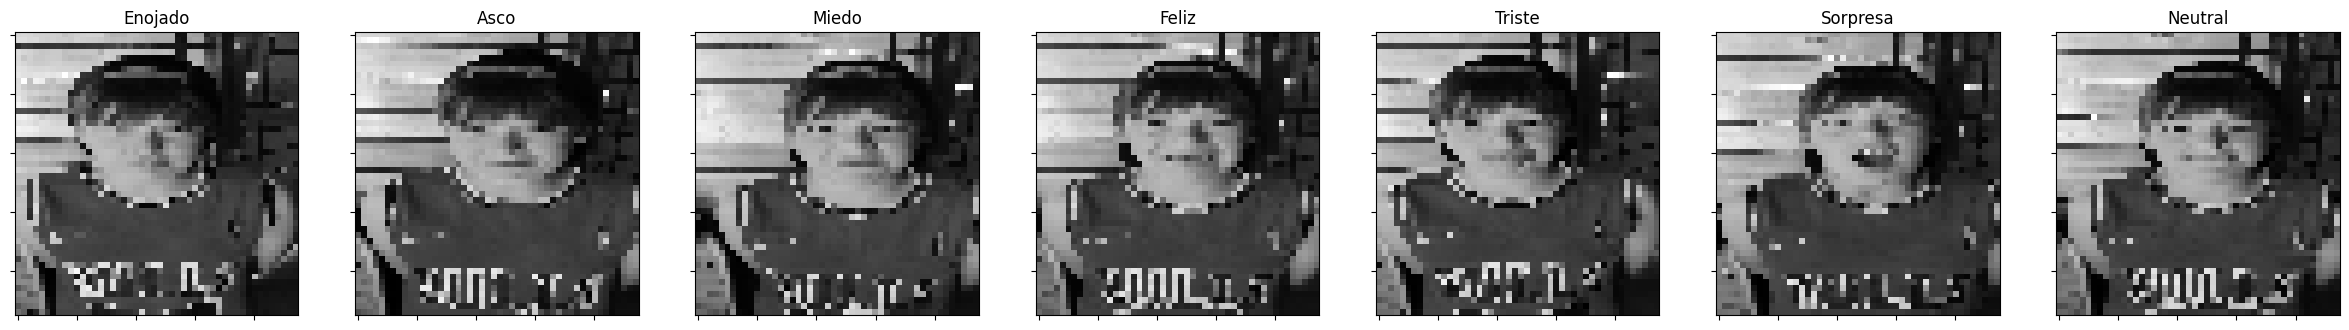

In [ ]:
plot_all_emotions()

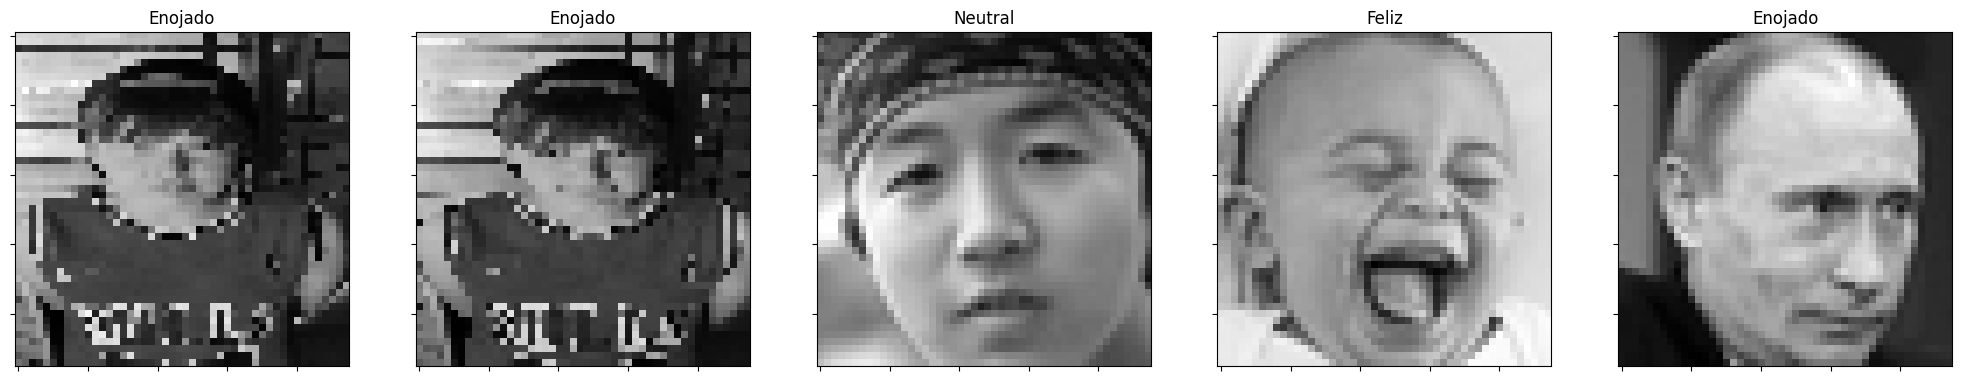

In [ ]:
plot_examples(label=0)

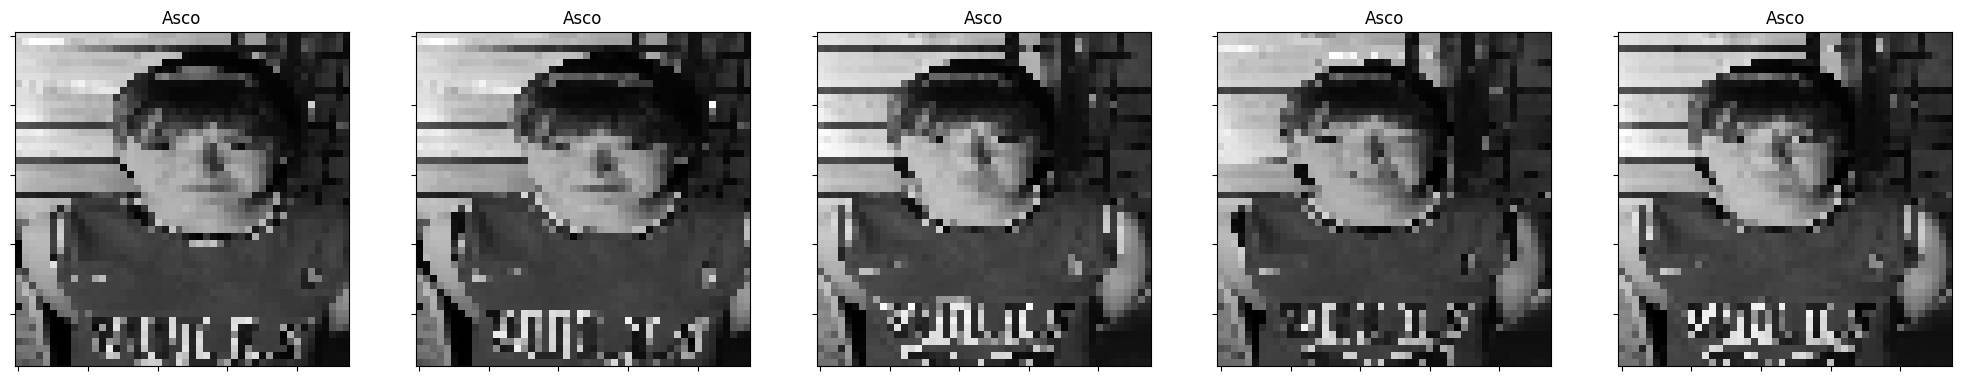

In [ ]:
plot_examples(label=1)

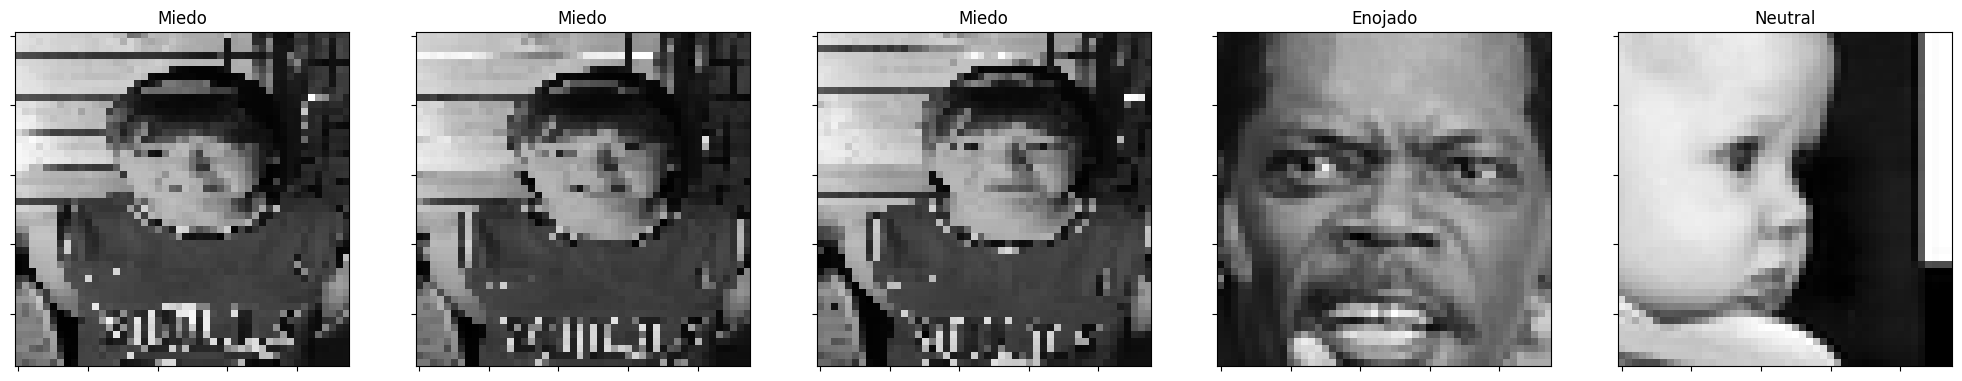

In [ ]:
plot_examples(label=2)

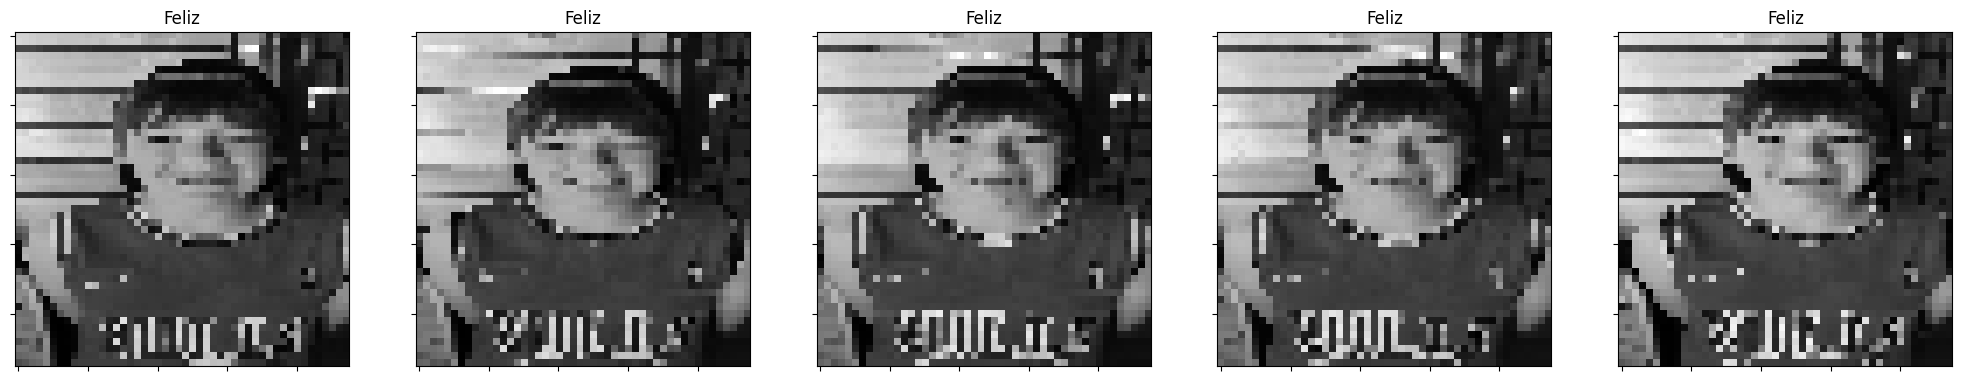

In [ ]:
plot_examples(label=3)

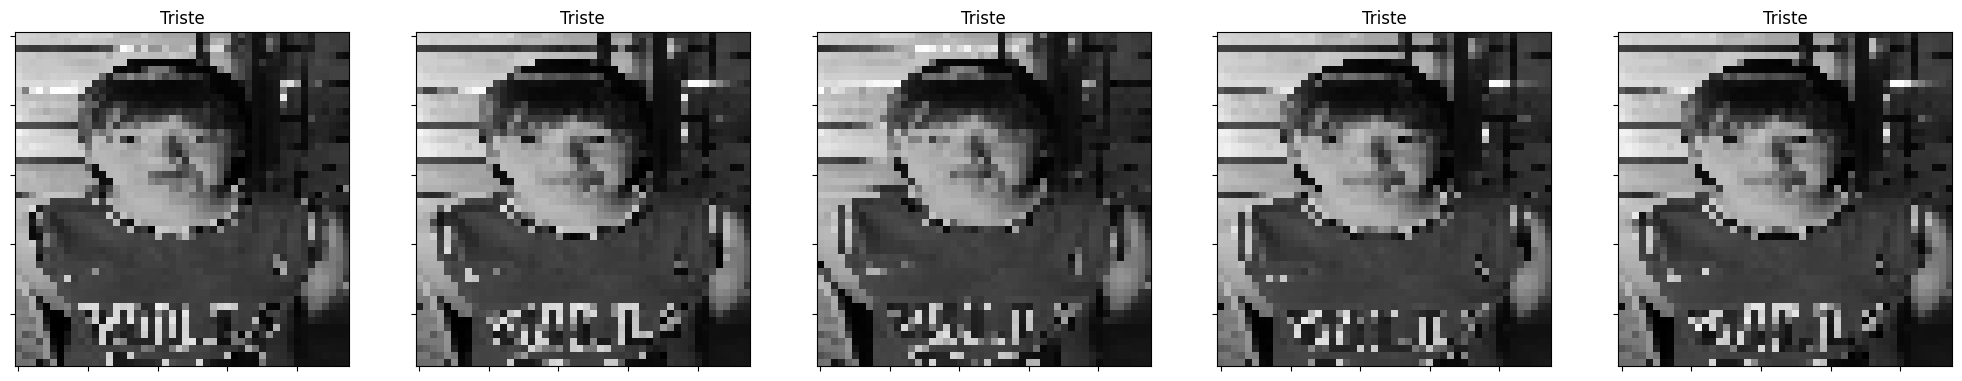

In [ ]:
plot_examples(label=4)

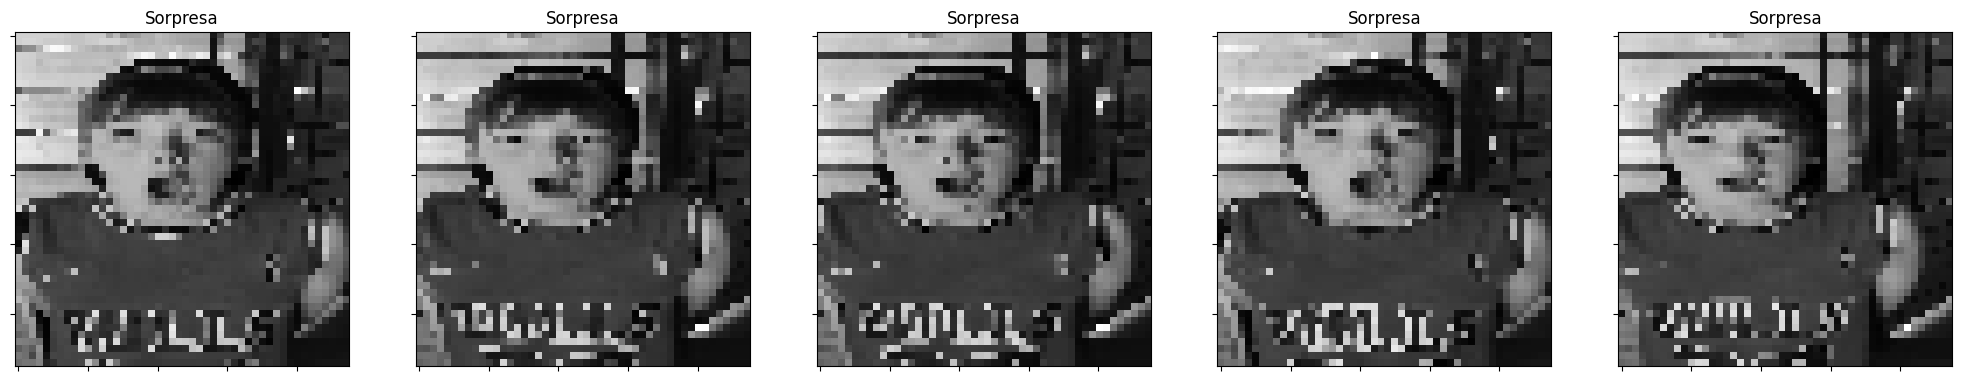

In [ ]:
plot_examples(label=5)

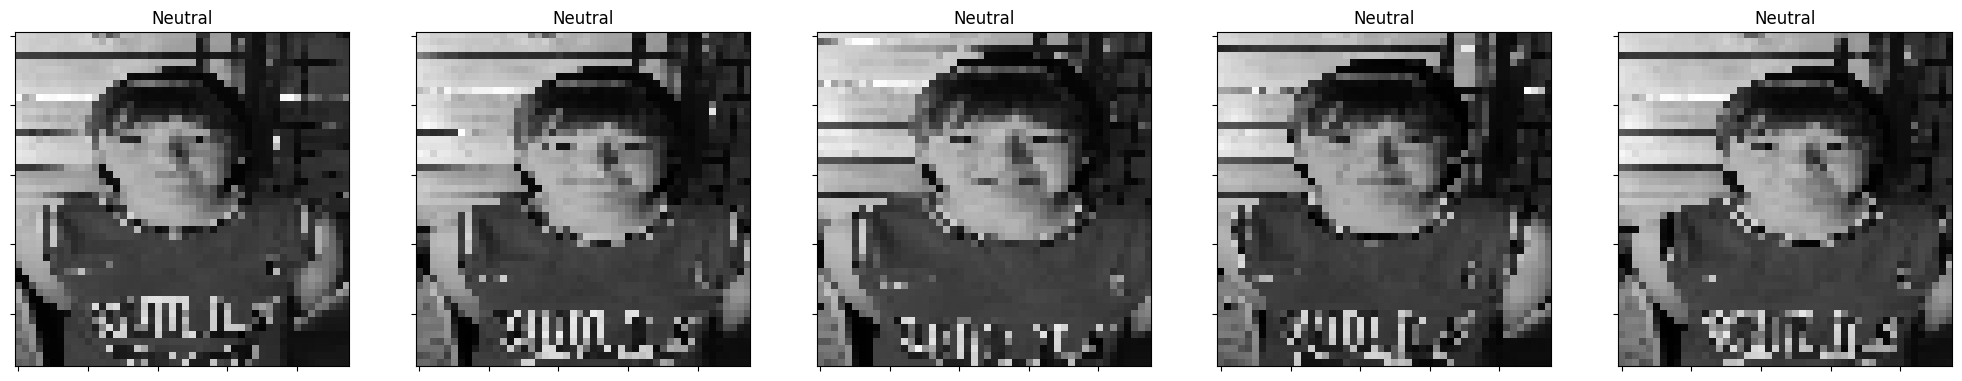

In [ ]:
plot_examples(label=6)

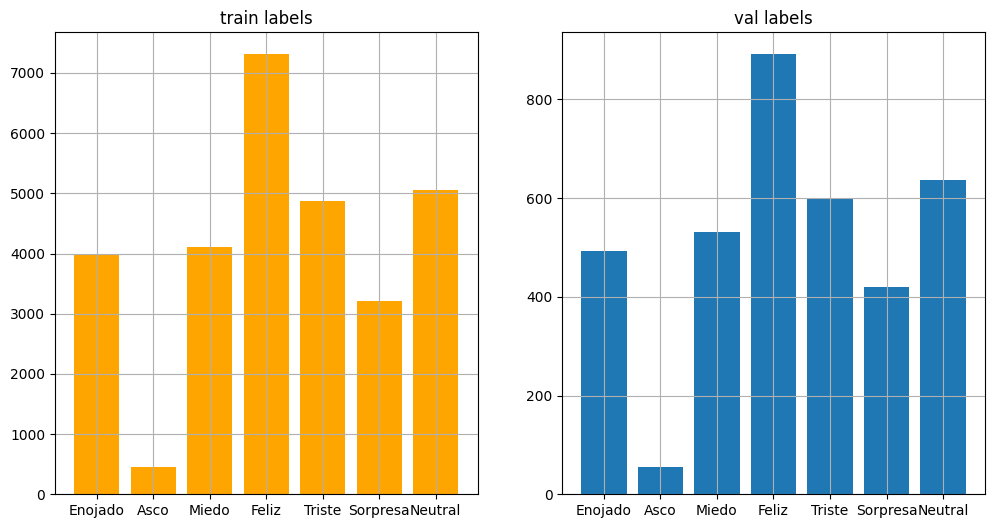

In [ ]:
#comparar las distribuciones de las etiquetas
plot_compare_distributions(train_labels, val_labels, title1='train labels', title2='val labels')

#**Entrenamiento del Modelo**





* Arquitectura del Modelo: Se utiliza un modelo secuencial que consiste  tres capas de convolución (Conv2D) y tres capas de agrupación (MaxPooling2D) para extraer características relevantes de las imágenes. Luego, se añaden capas totalmente conectadas (Dense) con 64 neuronas con activacion ReLU y una capa de salida con 7 neuronas.


In [ ]:
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

* Compilación del Modelo: Se configura el modelo para el entrenamiento con el optimizador Adam, la función de pérdida categorical_crossentropy (adecuada para la clasificación multiclase) y la métrica de precisión (accuracy).

In [ ]:
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0


* Aumento de Datos: Se utiliza la biblioteca imgaug para aplicar aumentos de datos como rotación, volteo horizontal y vertical, multiplicación de brillo, y desenfoque gaussiano. Esto ayuda a mejorar la capacidad del modelo para generalizar a nuevas expresiones faciales.

* Entrenamiento del Modelo: El modelo se entrena utilizando el conjunto de datos de entrenamiento aumentado y se valida con el conjunto de datos de validación. La clase de peso (class_weight) se puede especificar para manejar el desequilibrio en la distribución de clases.

In [ ]:
import imgaug.augmenters as iaa
from keras.preprocessing.image import ImageDataGenerator

# Crea un secuenciador de aumentos
augmenter = iaa.Sequential([
    iaa.Affine(rotate=(-20, 20)),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Multiply((0.8, 1.2)),
    iaa.GaussianBlur(sigma=(0.0, 1.0)),
])

# Crear un generador de datos aumentados para el conjunto de entrenamiento
def augment_images(images, labels):
    augmented_images = augmenter(images=images)
    return augmented_images, labels

# Entrenamiento del modelo con aumento de datos
augmented_train_data = (train_images, train_labels)

history = model.fit(*augmented_train_data,
                    validation_data=(val_images, val_labels),
                    class_weight=class_weight,
                    epochs=12,
                    batch_size=32)


Epoch 1/12
906/906 [==============================] - 24s 10ms/step - loss: 0.2567 - accuracy: 0.3498 - val_loss: 1.4952 - val_accuracy: 0.4237
Epoch 2/12
906/906 [==============================] - 8s 9ms/step - loss: 0.2133 - accuracy: 0.4689 - val_loss: 1.4515 - val_accuracy: 0.4756
Epoch 3/12
906/906 [==============================] - 11s 12ms/step - loss: 0.1942 - accuracy: 0.5170 - val_loss: 1.3515 - val_accuracy: 0.4974
Epoch 4/12
906/906 [==============================] - 6s 7ms/step - loss: 0.1813 - accuracy: 0.5515 - val_loss: 1.2606 - val_accuracy: 0.5236
Epoch 5/12
906/906 [==============================] - 7s 8ms/step - loss: 0.1701 - accuracy: 0.5821 - val_loss: 1.2675 - val_accuracy: 0.5435
Epoch 6/12
906/906 [==============================] - 6s 6ms/step - loss: 0.1597 - accuracy: 0.6072 - val_loss: 1.2441 - val_accuracy: 0.5457
Epoch 7/12
906/906 [==============================] - 6s 7ms/step - loss: 0.1491 - accuracy: 0.6331 - val_loss: 1.2521 - val_accuracy: 0.5476
Ep

In [ ]:
# Imprimir la precisión y la pérdida del modelo en el conjunto de entrenamiento
print("Precisión final en el conjunto de entrenamiento:", history.history['accuracy'][-1])
print("Pérdida final en el conjunto de entrenamiento:", history.history['loss'][-1])

Precisión final en el conjunto de entrenamiento: 0.7587027549743652
Pérdida final en el conjunto de entrenamiento: 0.09881604462862015


In [ ]:
# Guardar el modelo en el formato nativo de Keras
model.save("/content/drive/MyDrive/Deep learning/lab4y5/modelo1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


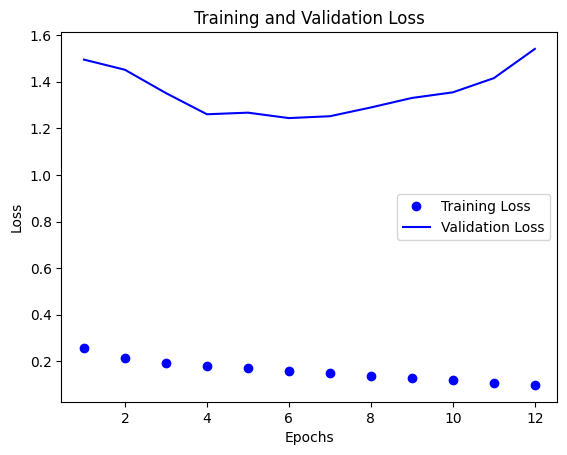

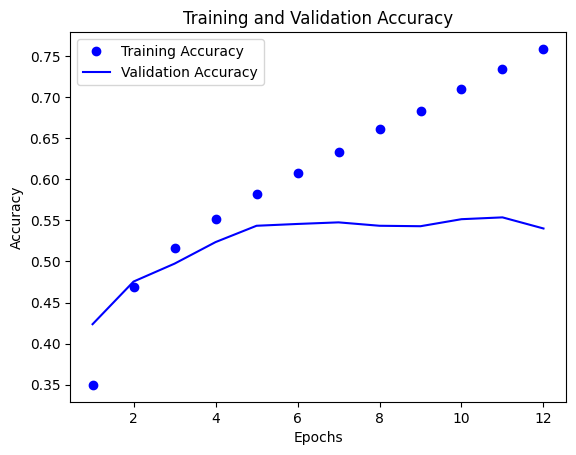

In [ ]:
# Obtener la pérdida y la precisión en el conjunto de entrenamiento
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Obtener la pérdida y la precisión en el conjunto de validación
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Visualizar las curvas de pérdida
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizar las curvas de precisión
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred_test_labels = model.predict(test_images)

114/114 [==============================] - 1s 4ms/step


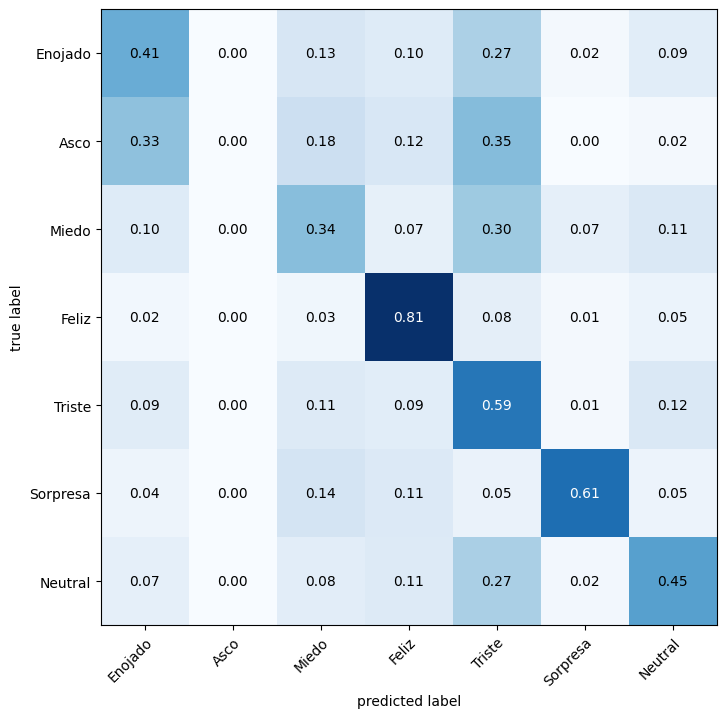

In [ ]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

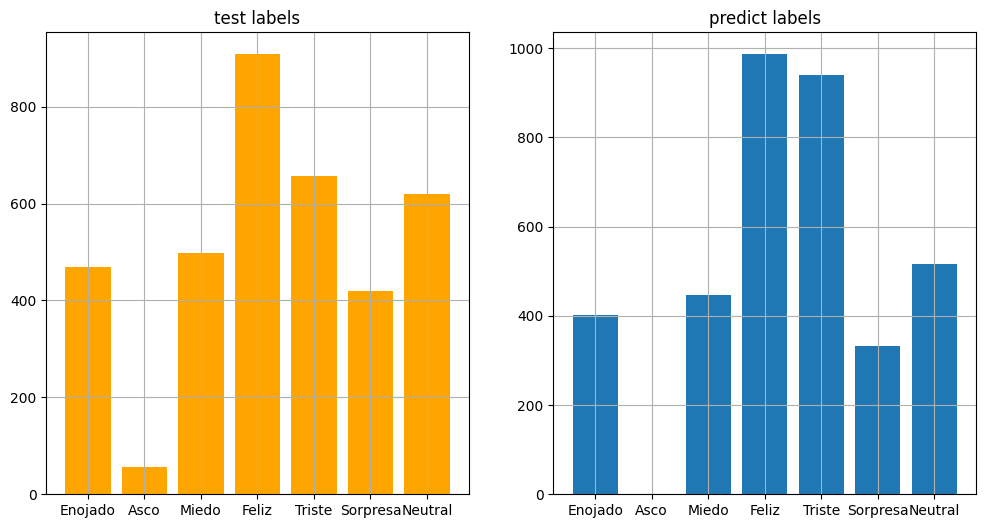

In [ ]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

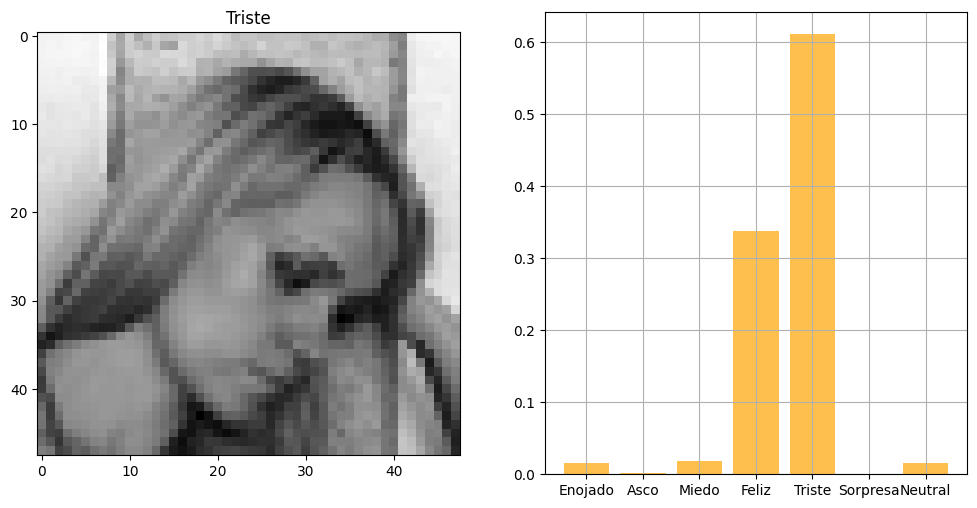

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 89)

# **Mejoramiento del modelo (fine-tuning)**

Utilizando el modelo previamente mencionado, se realizó un fine-tuning adicional empleando el mismo modelo preentrenado FER-2013, el cual se utilizó originalmente para etiquetar los fotogramas. De esta manera, se ajustaron aún más los parámetros del modelo para mejorar su capacidad de reconocimiento y clasificación de emociones en las imágenes. Este proceso de fine-tuning permitió perfeccionar y afinar el rendimiento del modelo, brindando resultados más precisos y detallados en la tarea de etiquetado de emociones en los fotogramas.

In [ ]:
import imgaug.augmenters as iaa
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

# Cargar el modelo preentrenado
pretrained_model = load_model('/content/drive/MyDrive/Deep learning/lab4y5/modelo_entrenado.h5')

# Añadir capas adicionales para fine-tuning, se agregan capas densas para adaptar el modelo a la tarea de FER2013
pretrained_model.add(Dense(256, activation='relu'))
pretrained_model.add(Dropout(0.5, name='my_dropout'))
pretrained_model.add(Dense(7, activation='softmax'))

# Compilar el modelo
pretrained_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Crea un secuenciador de aumentos
augmenter = iaa.Sequential([
    iaa.Affine(rotate=(-20, 20)),
    iaa.Fliplr(0.5),
    iaa.Flipud(0.5),
    iaa.Multiply((0.8, 1.2)),
    iaa.GaussianBlur(sigma=(0.0, 1.0)),
])

# Crear un generador de datos aumentados para el conjunto de entrenamiento
def augment_images(images, labels):
    augmented_images = augmenter(images=images)
    return augmented_images, labels

# Entrenamiento del modelo con fine-tuning y aumento de datos
history = pretrained_model.fit_generator(
    generator=ImageDataGenerator().flow(train_images, train_labels, batch_size=32),
    steps_per_epoch=len(train_images) // 32,
    validation_data=(val_images, val_labels),
    class_weight=class_weight,
    epochs=12
)

<ipython-input-31-bab7093cc097>:31: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = pretrained_model.fit_generator(


Epoch 1/12
905/905 [==============================] - 33s 25ms/step - loss: 0.0854 - accuracy: 0.8744 - val_loss: 1.5797 - val_accuracy: 0.5807
Epoch 2/12
905/905 [==============================] - 21s 23ms/step - loss: 0.0584 - accuracy: 0.9001 - val_loss: 1.6366 - val_accuracy: 0.5802
Epoch 3/12
905/905 [==============================] - 21s 23ms/step - loss: 0.0476 - accuracy: 0.9176 - val_loss: 1.7037 - val_accuracy: 0.5885
Epoch 4/12
905/905 [==============================] - 21s 23ms/step - loss: 0.0407 - accuracy: 0.9266 - val_loss: 1.6031 - val_accuracy: 0.6161
Epoch 5/12
905/905 [==============================] - 21s 23ms/step - loss: 0.0350 - accuracy: 0.9347 - val_loss: 1.6821 - val_accuracy: 0.5956
Epoch 6/12
905/905 [==============================] - 21s 23ms/step - loss: 0.0310 - accuracy: 0.9407 - val_loss: 1.6745 - val_accuracy: 0.6042
Epoch 7/12
905/905 [==============================] - 22s 24ms/step - loss: 0.0290 - accuracy: 0.9439 - val_loss: 1.7663 - val_accuracy:

In [ ]:
# Imprimir la precisión y la pérdida del modelo en el conjunto de entrenamiento
print("Precisión final en el conjunto de entrenamiento:", history.history['accuracy'][-1])
print("Pérdida final en el conjunto de entrenamiento:", history.history['loss'][-1])

Precisión final en el conjunto de entrenamiento: 0.9539253115653992
Pérdida final en el conjunto de entrenamiento: 0.021760039031505585


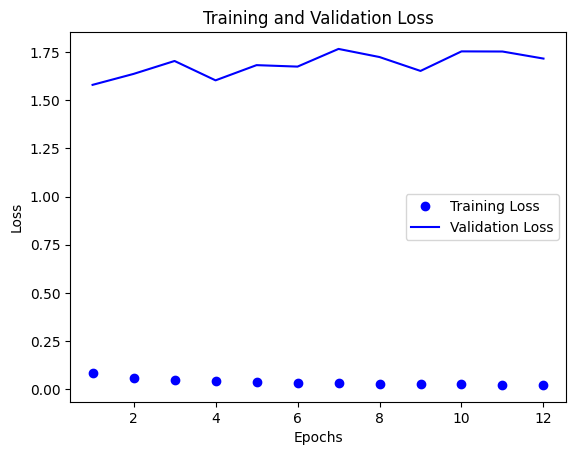

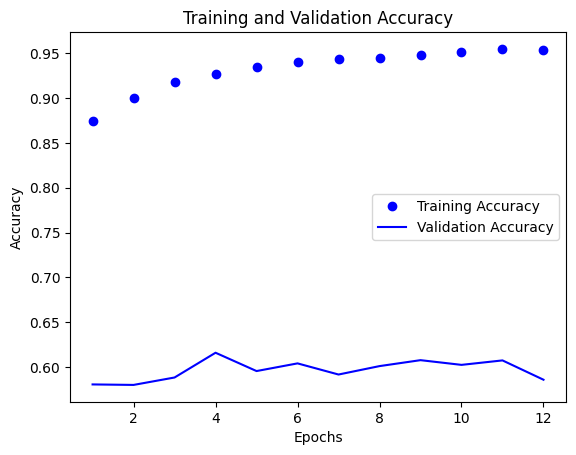

In [ ]:
# Obtener la pérdida y la precisión en el conjunto de entrenamiento
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

# Obtener la pérdida y la precisión en el conjunto de validación
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

# Visualizar las curvas de pérdida
import matplotlib.pyplot as plt

epochs = range(1, len(train_loss) + 1)

plt.plot(epochs, train_loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Visualizar las curvas de precisión
plt.plot(epochs, train_accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
pred_test_labels = model.predict(test_images)

114/114 [==============================] - 0s 2ms/step


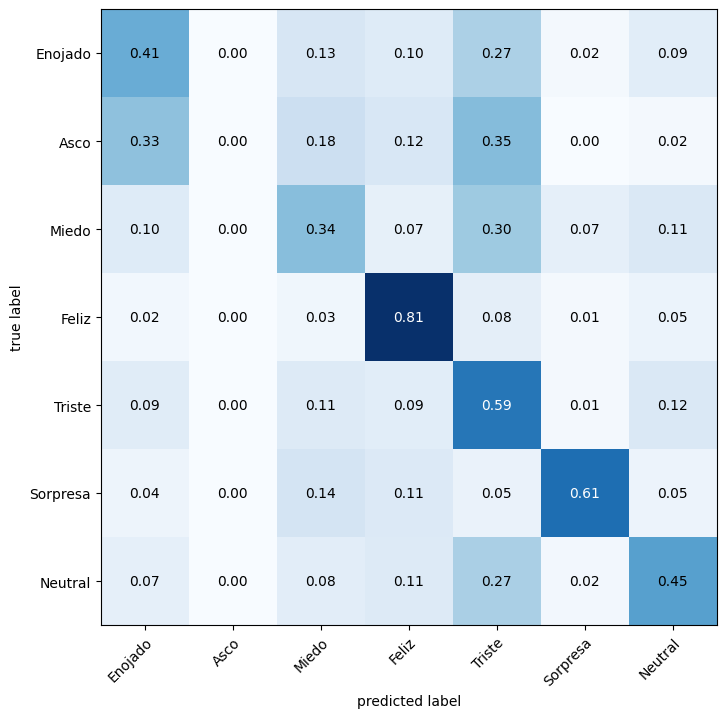

In [ ]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

In [ ]:
df_compare = pd.DataFrame()
df_compare['real'] = test_labels.argmax(axis=1)
df_compare['pred'] = pred_test_labels.argmax(axis=1)
df_compare['wrong'] = np.where(df_compare['real']!=df_compare['pred'], 1, 0)

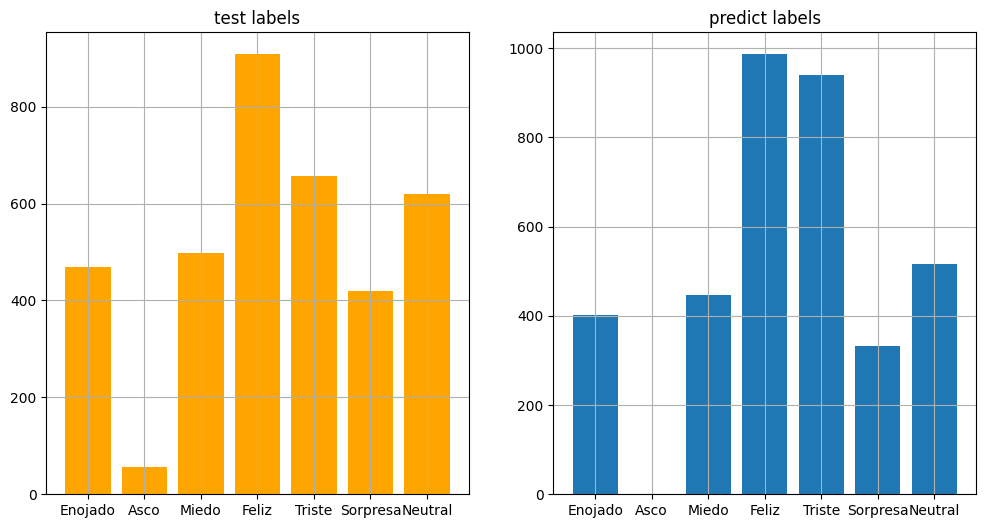

In [ ]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

In [ ]:
from sklearn.metrics import classification_report
# Calcula el reporte de clasificación
report = classification_report(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1), target_names=emotions.values())

# Imprime el reporte
print("Reporte de Clasificación:\n", report)

Reporte de Clasificación:
               precision    recall  f1-score   support

     Enojado       0.47      0.41      0.44       468
        Asco       0.00      0.00      0.00        57
       Miedo       0.38      0.34      0.36       497
       Feliz       0.74      0.81      0.77       908
      Triste       0.41      0.59      0.48       656
    Sorpresa       0.77      0.61      0.68       419
     Neutral       0.54      0.45      0.49       619

    accuracy                           0.55      3624
   macro avg       0.47      0.46      0.46      3624
weighted avg       0.55      0.55      0.55      3624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


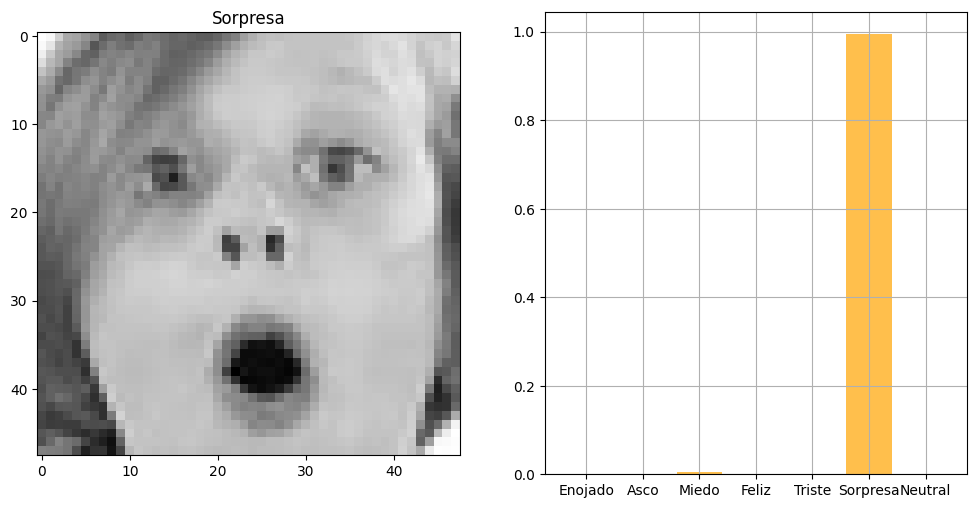

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 106)

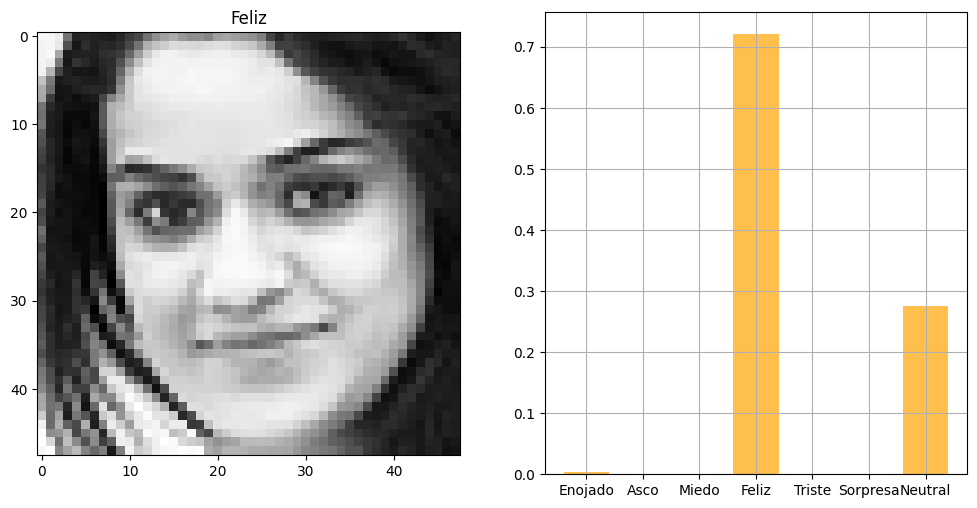

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 40)

In [ ]:
# Guardar el modelo en el formato nativo de Keras
model.save("/content/drive/MyDrive/Deep learning/lab4y5/modelo96.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# **Prueba**
Con este codigo podemos probar en tiempo real

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from keras.models import load_model
import io
from google.colab.patches import cv2_imshow

# Función para tomar foto
def tomar_foto(nombre_archivo='foto.jpg', calidad=0.8):
  js = Javascript('''
    async function tomarFoto(calidad) {
      const div = document.createElement('div');
      const capturar = document.createElement('button');
      capturar.textContent = 'Capturar';
      div.appendChild(capturar);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Redimensiona la salida para que se ajuste al elemento de video.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Espera a que se haga clic en Capturar.
      await new Promise((resolve) => capturar.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', calidad);
    }
    ''')
  display(js)
  data = eval_js('tomarFoto({})'.format(calidad))
  binario = b64decode(data.split(',')[1])
  with open(nombre_archivo, 'wb') as f:
    f.write(binario)
  return nombre_archivo

# Captura foto
try:
  nombre_archivo = tomar_foto()
  print('Guardado en {}'.format(nombre_archivo))

  # Carga la imagen
  img = cv2.imread(nombre_archivo, cv2.IMREAD_GRAYSCALE)

  # Carga el modelo
  modelo_entrenado = load_model('/content/drive/MyDrive/Deep learning/lab4y5/modelo1.h5')

  # Etiquetas de emociones
  emociones = {0: 'Enojado', 1: 'Asco', 2: 'Miedo', 3: 'Feliz', 4: 'Triste', 5: 'Sorpresa', 6: 'Neutral'}

  # Crea el clasificador de caras
  clasificador_caras = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  # Detecta caras en la imagen
  caras = clasificador_caras.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

  for (x, y, w, h) in caras:
    # Extrae la región de interés (ROI) que contiene la cara
    roi = img[y:y+h, x:x+w]

    # Preprocesa la ROI de la misma manera que los datos de entrenamiento
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype('float32')/255
    roi = np.reshape(roi, (1, 48, 48, 1))

    # Realiza la predicción utilizando el modelo
    predicciones = modelo_entrenado.predict(roi)
    etiqueta_emocion = emociones[predicciones.argmax()]

    # Dibuja el rectángulo alrededor de la cara y muestra la etiqueta
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, etiqueta_emocion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

  # Muestra la imagen resultante
  cv2_imshow(img)

except Exception as err:
  # Se lanzarán errores si el usuario no tiene una cámara web o si no
  # concede permiso a la página para acceder a ella.
  print(str(err))


Este video nos manda un video con sus etiquetas y deteccion del sentimiento

In [ ]:
import cv2
import numpy as np
from keras.models import load_model

# Carga el modelo entrenado
trained_model = load_model('/content/drive/MyDrive/Deep learning/lab4y5/modelo96.h5')

# Etiquetas de emociones
emotions = {0: 'Enojado', 1: 'Asco', 2: 'Miedo', 3: 'Feliz', 4: 'Triste', 5: 'Sorpresa', 6: 'Neutral'}

# Inicializa la captura de video desde el archivo
cap = cv2.VideoCapture('/content/drive/MyDrive/Deep learning/lab4y5/Video2.mp4')

# Obtiene las propiedades del video original
width = int(cap.get(3))
height = int(cap.get(4))
fps = cap.get(5)

# Crea el objeto VideoWriter para guardar el nuevo video etiquetado
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('/content/drive/MyDrive/Deep learning/lab4y5/Video2_eriq.mp4', fourcc, fps, (width, height))

# Crea el clasificador de caras de OpenCV (utiliza haarcascades que ya debería estar en OpenCV)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

while cap.isOpened():
    # Captura un frame del video
    ret, frame = cap.read()

    if not ret:
        break  # Sale del bucle si no hay más frames

    # Convierte la imagen a escala de grises
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detecta caras en el frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        # Extrae la región de interés (ROI) que contiene la cara
        roi = gray[y:y+h, x:x+w]

        # Preprocesa la ROI de la misma manera que los datos de entrenamiento
        roi = cv2.resize(roi, (48, 48))
        roi = roi.astype('float32')/255
        roi = np.reshape(roi, (1, 48, 48, 1))

        # Realiza la predicción utilizando el modelo
        predictions = trained_model.predict(roi)
        emotion_label = emotions[predictions.argmax()]

        # Dibuja el recuadro alrededor de la cara y muestra la etiqueta
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        cv2.putText(frame, emotion_label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

    # Guarda el frame procesado en el nuevo video etiquetado
    out.write(frame)

# Libera los recursos
cap.release()
out.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 17ms/step


# **Modelos preentrenados**

# **Modelo ResNet50**
Las arquitecturas ResNet son conocidas por su capacidad para aprender características complejas.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Cargar el modelo ResNet50 preentrenado con input_shape para imágenes en escala de grises
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Capa de expansión para replicar el canal en escala de grises tres veces
expand_layer = tf.keras.layers.Conv2D(3, (1, 1), activation='linear', input_shape=(48, 48, 1))

# Entrada para imágenes en escala de grises
inputs = tf.keras.Input(shape=(48, 48, 1))
expanded_inputs = expand_layer(inputs)

# Conectar la entrada expandida al modelo ResNet50
x = base_model(expanded_inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=12,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

94765736/94765736 [==============================] - 0s 0us/step
Epoch 1/12
906/906 [==============================] - 113s 77ms/step - loss: 1.4523 - accuracy: 0.4486 - val_loss: 1.6384 - val_accuracy: 0.3850
Epoch 2/12
906/906 [==============================] - 73s 81ms/step - loss: 1.2369 - accuracy: 0.5362 - val_loss: 1.3194 - val_accuracy: 0.4924
Epoch 3/12
906/906 [==============================] - 56s 62ms/step - loss: 1.1336 - accuracy: 0.5790 - val_loss: 1.2077 - val_accuracy: 0.5393
Epoch 4/12
906/906 [==============================] - 53s 58ms/step - loss: 1.0447 - accuracy: 0.6103 - val_loss: 1.1412 - val_accuracy: 0.5736
Epoch 5/12
906/906 [==============================] - 66s 73ms/step - loss: 0.9666 - accuracy: 0.6431 - val_loss: 1.2585 - val_accuracy: 0.5404
Epoch 6/12
906/906 [==============================] - 61s 67ms/step - loss: 0.8776 - accuracy: 0.6766 - val_loss: 1.0965 - val_accuracy: 0.5965
Epoch 7/12
906/906 [==============================] - 52s 57ms/step - 

In [ ]:
# Imprimir la precisión y la pérdida del modelo en el conjunto de entrenamiento
print("Precisión final en el conjunto de entrenamiento:", history.history['accuracy'][-1])
print("Pérdida final en el conjunto de entrenamiento:", history.history['loss'][-1])

Precisión final en el conjunto de entrenamiento: 0.8738657832145691
Pérdida final en el conjunto de entrenamiento: 0.3627339005470276


In [ ]:
# Guardar el modelo en el formato nativo de Keras
model.save("/content/drive/MyDrive/Deep learning/lab4y5/modelo_resnet50.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred_test_labels = model.predict(test_images)

114/114 [==============================] - 3s 16ms/step


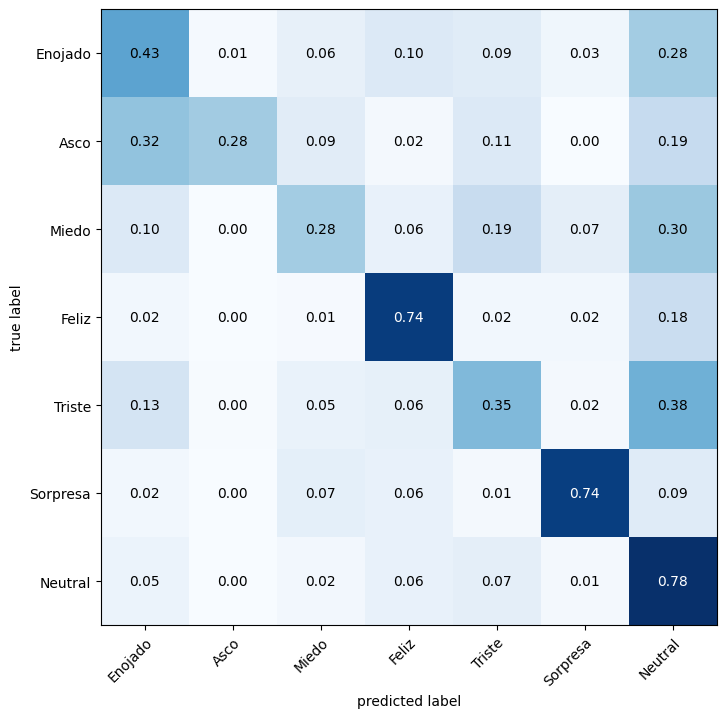

In [ ]:
conf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

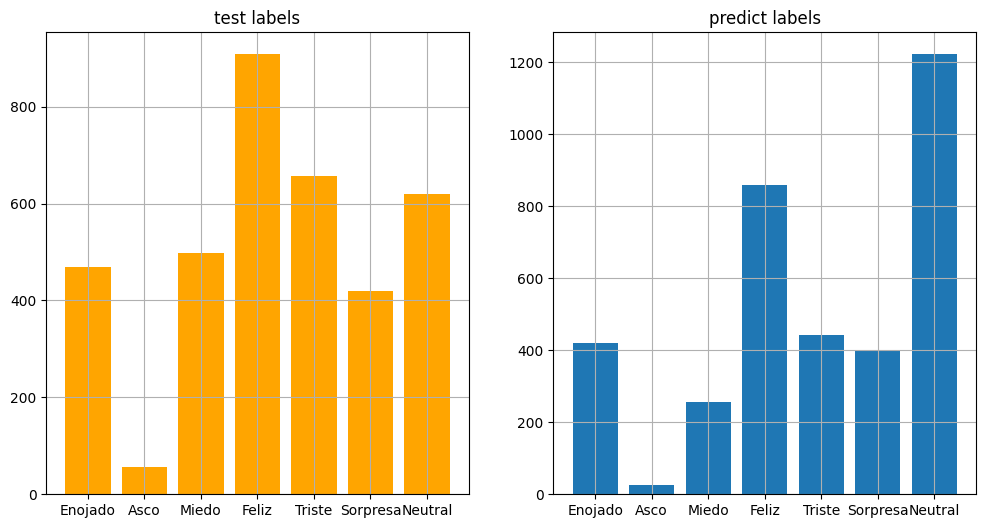

In [ ]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

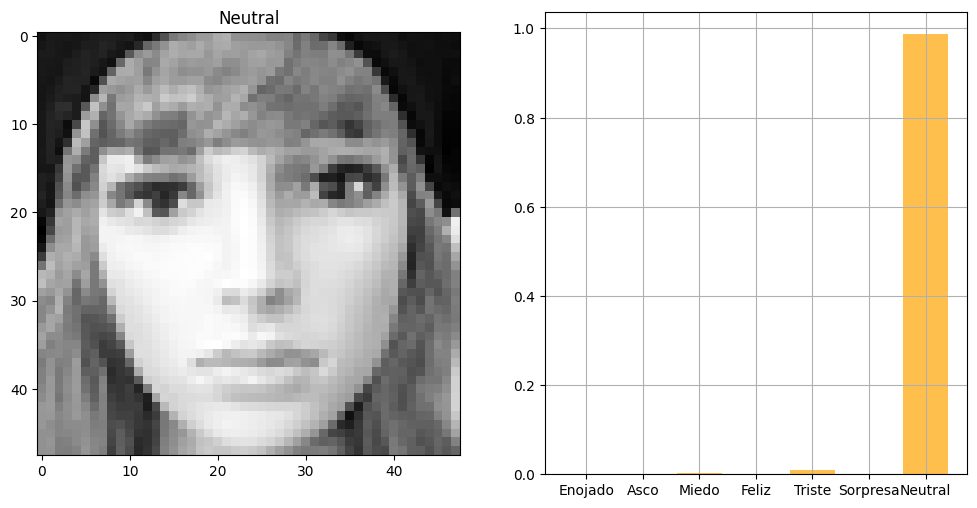

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 49)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from keras.models import load_model
import io
from google.colab.patches import cv2_imshow

# Función para tomar foto
def tomar_foto(nombre_archivo='foto.jpg', calidad=0.8):
  js = Javascript('''
    async function tomarFoto(calidad) {
      const div = document.createElement('div');
      const capturar = document.createElement('button');
      capturar.textContent = 'Capturar';
      div.appendChild(capturar);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Redimensiona la salida para que se ajuste al elemento de video.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Espera a que se haga clic en Capturar.
      await new Promise((resolve) => capturar.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', calidad);
    }
    ''')
  display(js)
  data = eval_js('tomarFoto({})'.format(calidad))
  binario = b64decode(data.split(',')[1])
  with open(nombre_archivo, 'wb') as f:
    f.write(binario)
  return nombre_archivo

# Captura foto
try:
  nombre_archivo = tomar_foto()
  print('Guardado en {}'.format(nombre_archivo))

  # Carga la imagen
  img = cv2.imread(nombre_archivo, cv2.IMREAD_GRAYSCALE)

  # Carga el modelo
  modelo_entrenado = load_model('/content/drive/MyDrive/Deep learning/lab4y5/modelo_resnet50.h5')

  # Etiquetas de emociones
  emociones = {0: 'Enojado', 1: 'Asco', 2: 'Miedo', 3: 'Feliz', 4: 'Triste', 5: 'Sorpresa', 6: 'Neutral'}

  # Crea el clasificador de caras
  clasificador_caras = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  # Detecta caras en la imagen
  caras = clasificador_caras.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

  for (x, y, w, h) in caras:
    # Extrae la región de interés (ROI) que contiene la cara
    roi = img[y:y+h, x:x+w]

    # Preprocesa la ROI de la misma manera que los datos de entrenamiento
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype('float32')/255
    roi = np.reshape(roi, (1, 48, 48, 1))

    # Realiza la predicción utilizando el modelo
    predicciones = modelo_entrenado.predict(roi)
    etiqueta_emocion = emociones[predicciones.argmax()]

    # Dibuja el rectángulo alrededor de la cara y muestra la etiqueta
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, etiqueta_emocion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

  # Muestra la imagen resultante
  cv2_imshow(img)

except Exception as err:
  # Se lanzarán errores si el usuario no tiene una cámara web o si no
  # concede permiso a la página para acceder a ella.
  print(str(err))

## **Modelo DenseNet121**

In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
import tensorflow as tf

# Cargar el modelo preentrenado DenseNet121
base_model = DenseNet121(input_shape=(48, 48, 3), include_top=False, weights='imagenet')

# Capa de expansión para replicar el canal en escala de grises tres veces
expand_layer = tf.keras.layers.Conv2D(3, (1, 1), activation='linear', input_shape=(48, 48, 1))

# Entrada para imágenes en escala de grises
inputs = tf.keras.Input(shape=(48, 48, 1))
expanded_inputs = expand_layer(inputs)

# Conectar la entrada expandida al modelo DenseNet121
x = base_model(expanded_inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=12,
    batch_size=32,
    validation_data=(val_images, val_labels)
)


Epoch 1/12
906/906 [==============================] - 140s 92ms/step - loss: 1.4906 - accuracy: 0.4256 - val_loss: 1.6705 - val_accuracy: 0.4079
Epoch 2/12
906/906 [==============================] - 83s 91ms/step - loss: 1.3203 - accuracy: 0.4997 - val_loss: 1.3561 - val_accuracy: 0.4783
Epoch 3/12
906/906 [==============================] - 81s 90ms/step - loss: 1.2349 - accuracy: 0.5323 - val_loss: 1.2923 - val_accuracy: 0.4874
Epoch 4/12
906/906 [==============================] - 80s 88ms/step - loss: 1.1223 - accuracy: 0.5818 - val_loss: 1.1383 - val_accuracy: 0.5559
Epoch 5/12
906/906 [==============================] - 80s 88ms/step - loss: 1.1083 - accuracy: 0.5869 - val_loss: 1.3885 - val_accuracy: 0.4792
Epoch 6/12
906/906 [==============================] - 87s 96ms/step - loss: 1.0204 - accuracy: 0.6217 - val_loss: 1.1608 - val_accuracy: 0.5702
Epoch 7/12
906/906 [==============================] - 81s 90ms/step - loss: 0.9790 - accuracy: 0.6380 - val_loss: 1.0736 - val_accuracy

In [ ]:
# Imprimir la precisión y la pérdida del modelo en el conjunto de entrenamiento
print("Precisión final en el conjunto de entrenamiento:", history.history['accuracy'][-1])
print("Pérdida final en el conjunto de entrenamiento:", history.history['loss'][-1])

Precisión final en el conjunto de entrenamiento: 0.7613938450813293
Pérdida final en el conjunto de entrenamiento: 0.666921854019165


In [ ]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras import layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
import tensorflow as tf

# Cargar el modelo preentrenado DenseNet121
base_model = DenseNet121(input_shape=(48, 48, 3), include_top=False, weights='imagenet')

# Capa de expansión para replicar el canal en escala de grises tres veces
expand_layer = tf.keras.layers.Conv2D(3, (1, 1), activation='linear', input_shape=(48, 48, 1))

# Entrada para imágenes en escala de grises
inputs = tf.keras.Input(shape=(48, 48, 1))
expanded_inputs = expand_layer(inputs)

# Conectar la entrada expandida al modelo DenseNet121
x = base_model(expanded_inputs)
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=inputs, outputs=predictions)

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_images,
    train_labels,
    epochs=12,
    batch_size=32,
    validation_data=(val_images, val_labels)
)

Epoch 1/12
906/906 [==============================] - 140s 89ms/step - loss: 1.4905 - accuracy: 0.4222 - val_loss: 7.7034 - val_accuracy: 0.2992
Epoch 2/12
906/906 [==============================] - 80s 88ms/step - loss: 1.3708 - accuracy: 0.4776 - val_loss: 1.4580 - val_accuracy: 0.4847
Epoch 3/12
906/906 [==============================] - 79s 87ms/step - loss: 1.2539 - accuracy: 0.5195 - val_loss: 1.3908 - val_accuracy: 0.4725
Epoch 4/12
906/906 [==============================] - 80s 89ms/step - loss: 1.2182 - accuracy: 0.5415 - val_loss: 1.1794 - val_accuracy: 0.5523
Epoch 5/12
906/906 [==============================] - 90s 99ms/step - loss: 1.1164 - accuracy: 0.5827 - val_loss: 1.1802 - val_accuracy: 0.5697
Epoch 6/12
906/906 [==============================] - 102s 113ms/step - loss: 1.0981 - accuracy: 0.5919 - val_loss: 1.1959 - val_accuracy: 0.5399
Epoch 7/12
906/906 [==============================] - 96s 106ms/step - loss: 1.0633 - accuracy: 0.6007 - val_loss: 1.1191 - val_accur

In [ ]:
# Imprimir la precisión y la pérdida del modelo en el conjunto de entrenamiento
print("Precisión final en el conjunto de entrenamiento:", history.history['accuracy'][-1])
print("Pérdida final en el conjunto de entrenamiento:", history.history['loss'][-1])

Precisión final en el conjunto de entrenamiento: 0.6950491666793823
Pérdida final en el conjunto de entrenamiento: 0.8323653936386108


In [ ]:
# Guardar el modelo en el formato nativo de Keras
model.save("/content/drive/MyDrive/Deep learning/lab4y5/modelo_desnet211.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
pred_test_labels = model.predict(test_images)

114/114 [==============================] - 4s 19ms/step


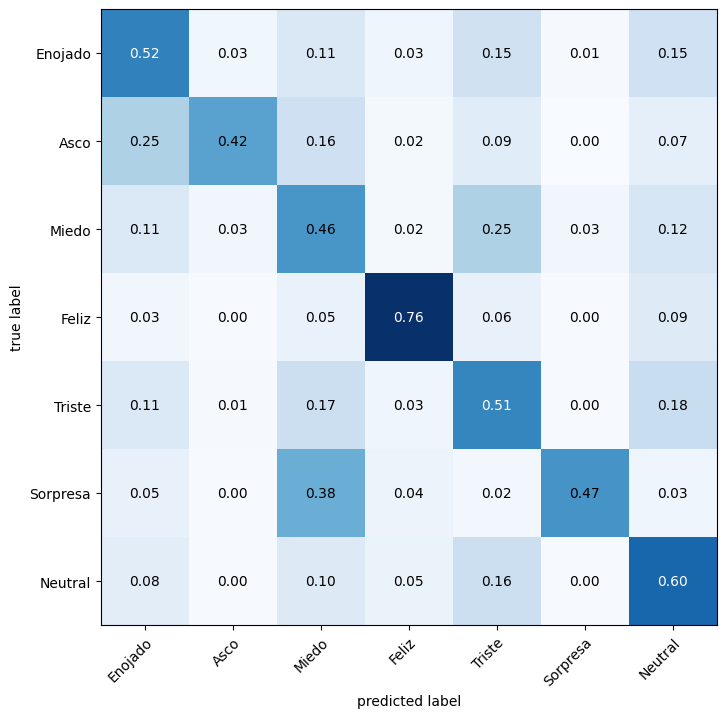

In [ ]:
Mconf_mat = confusion_matrix(test_labels.argmax(axis=1), pred_test_labels.argmax(axis=1))

fig, ax = plot_confusion_matrix(conf_mat=conf_mat,
                                show_normed=True,
                                show_absolute=False,
                                class_names=emotions.values(),
                                figsize=(8, 8))
fig.show()

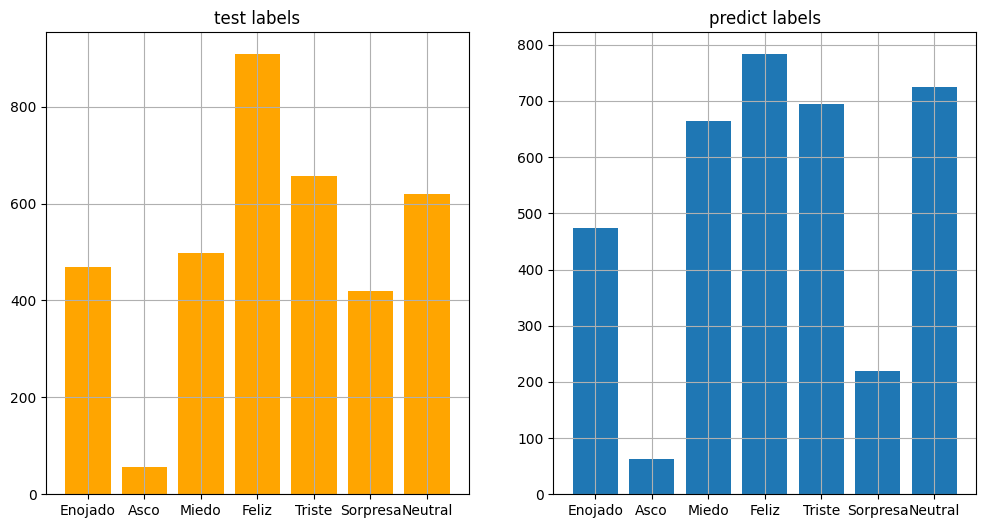

In [ ]:
plot_compare_distributions(test_labels, pred_test_labels, title1='test labels', title2='predict labels')

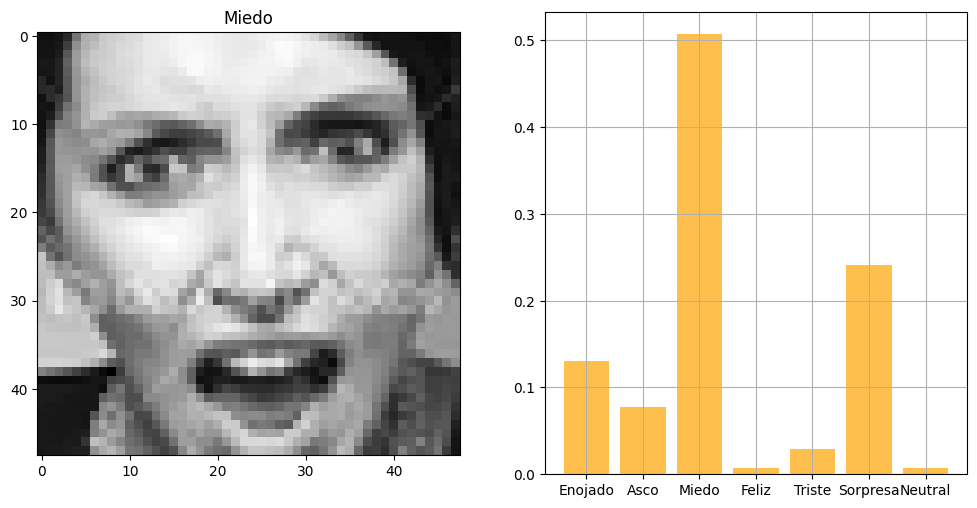

In [ ]:
plot_image_and_emotion(test_image_array, test_image_label, pred_test_labels, 140)

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from keras.models import load_model
import io
from google.colab.patches import cv2_imshow

# Función para tomar foto
def tomar_foto(nombre_archivo='foto.jpg', calidad=0.8):
  js = Javascript('''
    async function tomarFoto(calidad) {
      const div = document.createElement('div');
      const capturar = document.createElement('button');
      capturar.textContent = 'Capturar';
      div.appendChild(capturar);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Redimensiona la salida para que se ajuste al elemento de video.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Espera a que se haga clic en Capturar.
      await new Promise((resolve) => capturar.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', calidad);
    }
    ''')
  display(js)
  data = eval_js('tomarFoto({})'.format(calidad))
  binario = b64decode(data.split(',')[1])
  with open(nombre_archivo, 'wb') as f:
    f.write(binario)
  return nombre_archivo

# Captura foto
try:
  nombre_archivo = tomar_foto()
  print('Guardado en {}'.format(nombre_archivo))

  # Carga la imagen
  img = cv2.imread(nombre_archivo, cv2.IMREAD_GRAYSCALE)

  # Carga el modelo
  modelo_entrenado = load_model('/content/drive/MyDrive/Deep learning/lab4y5/modelo_desnet211.h5')

  # Etiquetas de emociones
  emociones = {0: 'Enojado', 1: 'Asco', 2: 'Miedo', 3: 'Feliz', 4: 'Triste', 5: 'Sorpresa', 6: 'Neutral'}

  # Crea el clasificador de caras
  clasificador_caras = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

  # Detecta caras en la imagen
  caras = clasificador_caras.detectMultiScale(img, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

  for (x, y, w, h) in caras:
    # Extrae la región de interés (ROI) que contiene la cara
    roi = img[y:y+h, x:x+w]

    # Preprocesa la ROI de la misma manera que los datos de entrenamiento
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype('float32')/255
    roi = np.reshape(roi, (1, 48, 48, 1))

    # Realiza la predicción utilizando el modelo
    predicciones = modelo_entrenado.predict(roi)
    etiqueta_emocion = emociones[predicciones.argmax()]

    # Dibuja el rectángulo alrededor de la cara y muestra la etiqueta
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, etiqueta_emocion, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

  # Muestra la imagen resultante
  cv2_imshow(img)

except Exception as err:
  # Se lanzarán errores si el usuario no tiene una cámara web o si no
  # concede permiso a la página para acceder a ella.
  print(str(err))